In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re
import functions_social as fs

In [2]:
%store -r my_data
%store -r fb_data

In [3]:
fb_data = fb_data*100.0

In [4]:
fb_data.columns

Index([u'2016-10', u'2016-11', u'2016-12', u'2017-01', u'2017-02', u'2017-03',
       u'2017-04', u'2017-05', u'2017-06', u'2017-07', u'2017-08', u'2017-09',
       u'2017-10', u'2017-11', u'2017-12', u'2018-01', u'2018-02', u'2018-03'],
      dtype='object', name=u'year_month')

In [5]:
mb = fb_data.T.reset_index()
mb

,year_month,giphy,bedbathandbeyond,citibankonline,gofundme,hooch,coursehero,steampowered,mlb,thrillist,...,wordpress,cbssports,miamiherald,harborfreight,whatsapp,linkedin,politifact,macys,fidelity,rxlist
0,2016-10,69.2517,27.5827,49.3081,68.4707,46.1538,58.046,31.249,43.3581,83.949,...,67.9266,49.1009,39.9742,25.1325,71.6767,61.6501,55.8581,50.9313,44.9242,84.6194
1,2016-11,76.8725,37.1334,51.5568,55.4333,94.4004,54.0013,32.6265,42.5436,88.3392,...,70.4978,50.7393,26.3801,35.7889,70.2657,58.0095,46.5395,61.5452,48.8158,76.9287
2,2016-12,71.3486,34.8982,50.4376,65.5746,97.6407,54.4896,30.3799,41.2257,81.2881,...,66.0403,50.96,46.0937,29.8184,68.2194,57.8071,52.8253,58.6389,41.6735,65.4002
3,2017-01,74.7151,36.1853,48.5563,75.3711,97.2696,57.6352,26.2719,45.9017,83.3629,...,65.6153,48.6118,40.3544,30.1265,67.9346,58.2891,61.6136,51.5281,38.0151,65.5623
4,2017-02,73.7331,34.562,53.0932,77.9933,99.0114,56.3309,31.3807,42.3126,87.0051,...,65.4433,51.1596,63.2905,30.7808,66.0083,56.2696,40.785,50.2516,35.112,72.7861
5,2017-03,66.1544,31.7902,53.6529,66.4931,98.4366,51.3722,30.6744,39.0568,87.5492,...,64.9751,47.6224,38.2523,30.5198,66.2771,53.2162,58.0436,41.2706,34.0821,61.7237
6,2017-04,54.5546,24.9899,43.7414,73.4161,98.3292,49.4554,29.3219,31.3133,87.6742,...,63.9859,37.8308,40.7285,29.6019,65.2119,52.6981,42.1642,48.4317,32.999,62.0703
7,2017-05,52.6959,32.1078,49.4554,75.3233,97.821,49.943,29.1579,29.3529,84.5241,...,63.8335,43.8424,34.8641,31.889,64.6888,51.4582,52.8708,42.9307,39.2614,58.1605
8,2017-06,51.686,30.2021,49.1251,72.5201,95.6852,45.1102,27.6242,30.7569,86.2739,...,59.5151,42.0376,41.7766,31.4665,65.0556,48.9625,54.8211,43.8266,40.4739,70.8883
9,2017-07,56.1565,36.4155,47.8705,73.0597,91.5089,42.871,27.9918,31.617,84.8941,...,61.9167,44.826,53.2011,22.9836,70.1958,48.9184,52.818,57.3575,36.0392,63.9804


In [6]:
df_long = pd.melt(mb,'year_month', var_name = 'site',value_name ='share' )
df_long['share'] = df_long['share'].astype(np.float)
df_long

,year_month,site,share
0,2016-10,giphy,69.251741
1,2016-11,giphy,76.872466
2,2016-12,giphy,71.348571
3,2017-01,giphy,74.715119
4,2017-02,giphy,73.733118
5,2017-03,giphy,66.154375
6,2017-04,giphy,54.554559
7,2017-05,giphy,52.695853
8,2017-06,giphy,51.685998
9,2017-07,giphy,56.156473


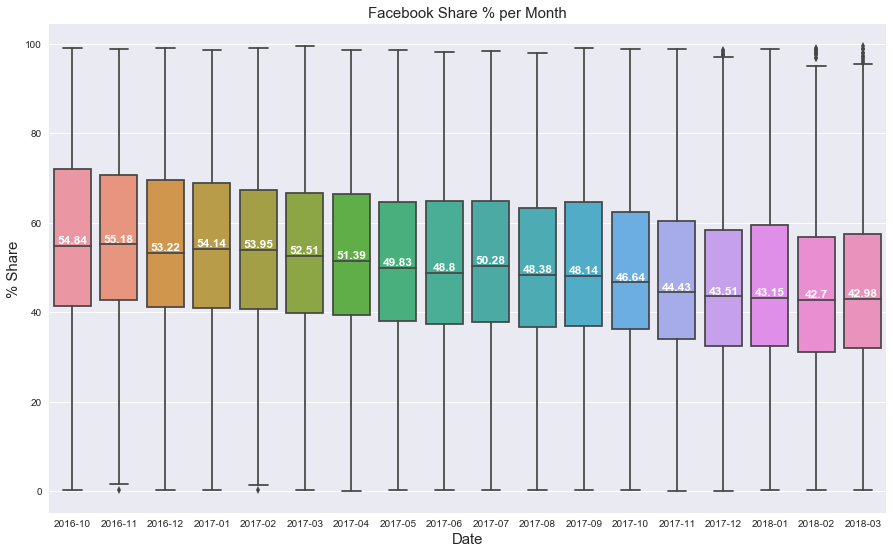

In [7]:
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='year_month',y='share',data=df_long)
#ax = sns.swarmplot(x='year_month',y='share',data=df_long)
medians = df_long.groupby(['year_month'])['share'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Facebook Share % per Month',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('% Share',fontsize=15)

plt.show()

In [8]:
#year of year boxplot from 10,11,12,1,2,3

In [9]:
%store -r fb_year_10
%store -r fb_year_11
%store -r fb_year_12

%store -r fb_year_1
%store -r fb_year_2
%store -r fb_year_3

In [10]:
fb_year_10['year_month'] = 'October'
fb_year_10 = fb_year_10.rename(columns={'year_month':'month'})
fb_year_10 = fb_year_10.iloc[:,-2:]

In [11]:
fb_year_11['year_month'] = 'November'
fb_year_11 = fb_year_11.rename(columns={'year_month':'month'})
fb_year_11 = fb_year_11.iloc[:,-2:]

In [12]:
fb_year_12['year_month'] = 'December'
fb_year_12 = fb_year_12.rename(columns={'year_month':'month'})
fb_year_12 = fb_year_12.iloc[:,-2:]

In [13]:
fb_year_1['year_month'] = 'January'
fb_year_1 = fb_year_1.rename(columns={'year_month':'month'})
fb_year_1 = fb_year_1.iloc[:,-2:]

In [14]:
fb_year_2['year_month'] = 'February'
fb_year_2 = fb_year_2.rename(columns={'year_month':'month'})
fb_year_2 = fb_year_2.iloc[:,-2:]

In [15]:
fb_year_3['year_month'] = 'March'
fb_year_3 = fb_year_3.rename(columns={'year_month':'month'})
fb_year_3 = fb_year_3.iloc[:,-2:]

In [16]:
fb_all = fb_year_10.append([fb_year_11,fb_year_12,fb_year_1,fb_year_2,fb_year_3])

In [17]:
fb_all['perc_change'] = fb_all['perc_change'].astype(float)

In [18]:
fb_all = fb_all.reset_index()
fb_all = fb_all[['perc_change','month']]

In [19]:
fb_all

year_month,perc_change,month
0,41.766714,October
1,40.692114,October
2,38.565444,October
3,35.046369,October
4,31.874693,October
5,29.123891,October
6,25.091087,October
7,23.882783,October
8,23.285881,October
9,22.402315,October


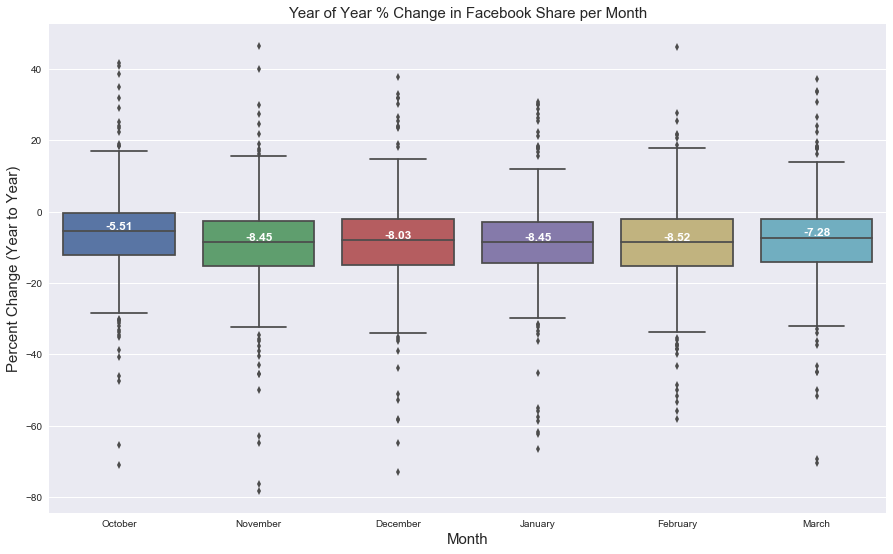

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,9))
ax = sns.boxplot(x='month',y='perc_change',data=fb_all)

medians = fb_all.groupby(['month'],sort=False)['perc_change'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

#display median values
pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='w', weight='semibold')
    
#labels
ax.set_title('Year of Year % Change in Facebook Share per Month',fontsize=15)
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Percent Change (Year to Year)',fontsize=15)
plt.show()